<a href="https://colab.research.google.com/github/hyejeong0807/dacon/blob/main/%ED%8E%AD%EA%B7%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [49]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dacon/dataset/train.csv')

In [50]:
data = data.drop('id', axis=1)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              114 non-null    object 
 1   Island               114 non-null    object 
 2   Clutch Completion    114 non-null    object 
 3   Culmen Length (mm)   114 non-null    float64
 4   Culmen Depth (mm)    114 non-null    float64
 5   Flipper Length (mm)  114 non-null    int64  
 6   Sex                  111 non-null    object 
 7   Delta 15 N (o/oo)    111 non-null    float64
 8   Delta 13 C (o/oo)    111 non-null    float64
 9   Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.0+ KB


In [52]:
# 컬럼 별 결측치 확인
def check_missing_col(dataframe):
  missing_col = []
  counted_missing_col = 0
  for i, col in enumerate(dataframe.columns):
    missing_values = sum(dataframe[col].isna())
    is_missing = True if missing_values >= 1 else False
    if is_missing:
      counted_missing_col += 1
      print(f'결측치가 존재하는 컬럼은: {col}입니다.')
      print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
      missing_col.append([col, dataframe[col].dtype])
  if counted_missing_col == 0:
    print('결측치가 존재하지 않습니다.')
  return missing_col

In [53]:
missing_col = check_missing_col(data)

결측치가 존재하는 컬럼은: Sex입니다.
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 존재하는 컬럼은: Delta 15 N (o/oo)입니다.
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 존재하는 컬럼은: Delta 13 C (o/oo)입니다.
해당 컬럼에 총 3개의 결측치가 존재합니다.


In [54]:
data[data.isna().sum(axis=1)>0]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [55]:
def handle_na(data, missing_col):
  temp = data.copy()
  for col, dtype in missing_col:
    #if dtype == 'O':
    #  temp.loc[:, col] = temp[col].fillna(temp[[col, 'Body Mass (g)']].)
    #  temp = temp.dropna(subset=[col])
    if dtype == int or dtype == float:
      temp.loc[:, col] = temp[col].fillna(temp[col].mean())
  #temp = temp.reset_index(drop=True)
  return temp

In [56]:
data = handle_na(data, missing_col)

In [57]:
missing_col = check_missing_col(data)

결측치가 존재하는 컬럼은: Sex입니다.
해당 컬럼에 총 3개의 결측치가 존재합니다.


In [58]:
data

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.305150,-25.190170,5550
1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.630740,-24.346840,3800
2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.519510,-27.018540,4400
3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.201060,-26.165240,4850
4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.383240,-26.842720,5700
...,...,...,...,...,...,...,...,...,...,...
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,8.737634,-25.723051,3700
110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.110060,-25.795490,4250
111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.970250,-26.036790,4100
112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.805890,-24.737350,2700


**기초 통계 분석**

In [59]:
data.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000
mean,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,5.321829,1.941363,14.653425,0.560112,0.848296,781.766484
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.325000,15.225000,190.000000,8.273890,-26.414327,3675.000000
50%,45.200000,17.250000,199.000000,8.635460,-25.897875,4250.000000
75%,49.075000,18.600000,216.000000,9.256210,-25.012013,4850.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [60]:
data.dtypes

Species                 object
Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)      int64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Body Mass (g)            int64
dtype: object

In [61]:
numeric_feature = data.columns[(data.dtypes == int) | (data.dtypes == float)]
categorical_feature = data.columns[data.dtypes == 'O']

In [62]:
print('수치형 데이터는 다음과 같습니다.\n', list(numeric_feature))
print('카테고리형 데이터는 다음과 같습니다.\n', list(categorical_feature))

수치형 데이터는 다음과 같습니다.
 ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)']
카테고리형 데이터는 다음과 같습니다.
 ['Species', 'Island', 'Clutch Completion', 'Sex']


**수치형 데이터 시각화**

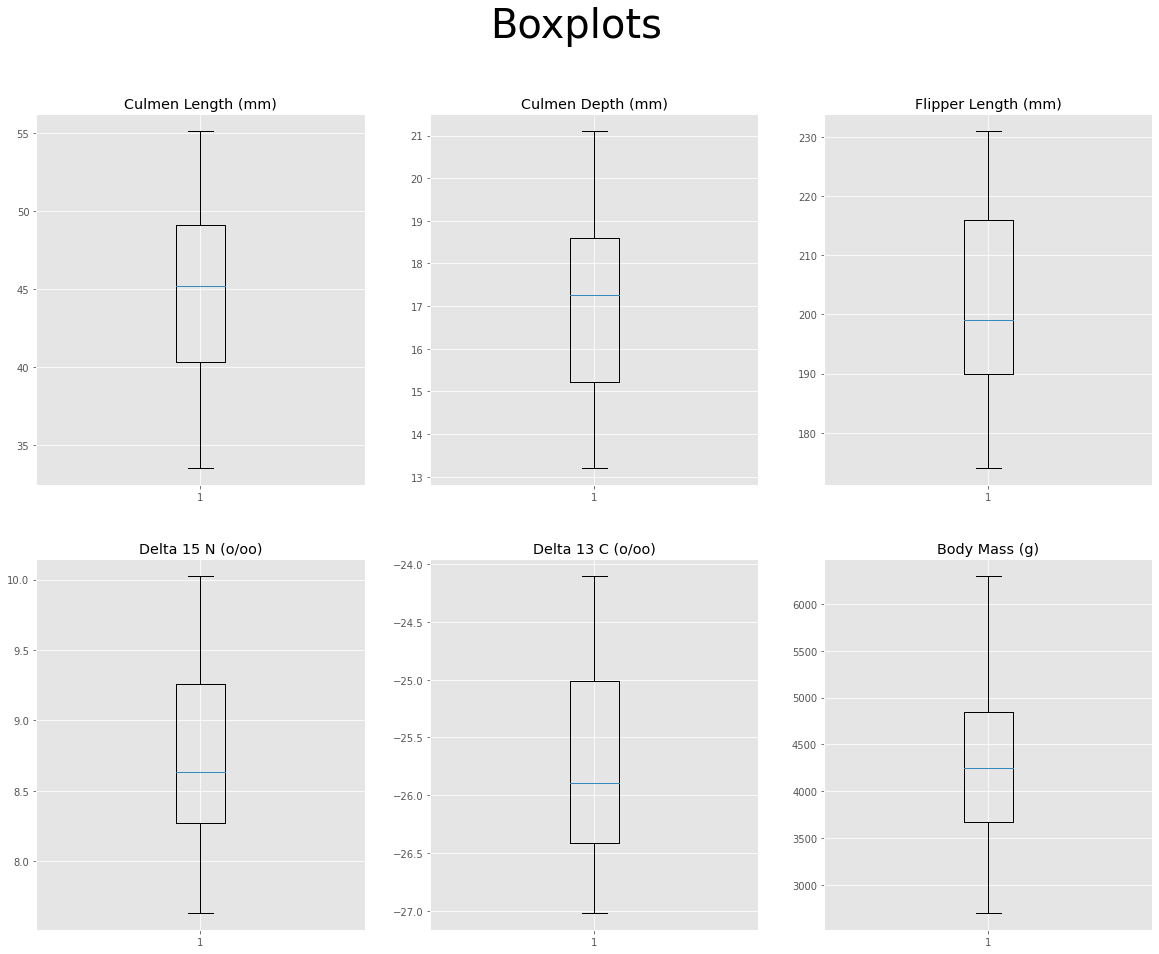

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

plt.figure(figsize=(20, 15))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(feature)):
  plt.subplot(2, 3, i+1)
  plt.title(feature[i])
  plt.boxplot(data[feature[i]])

plt.show()

**카테고리형 데이터 시각화**

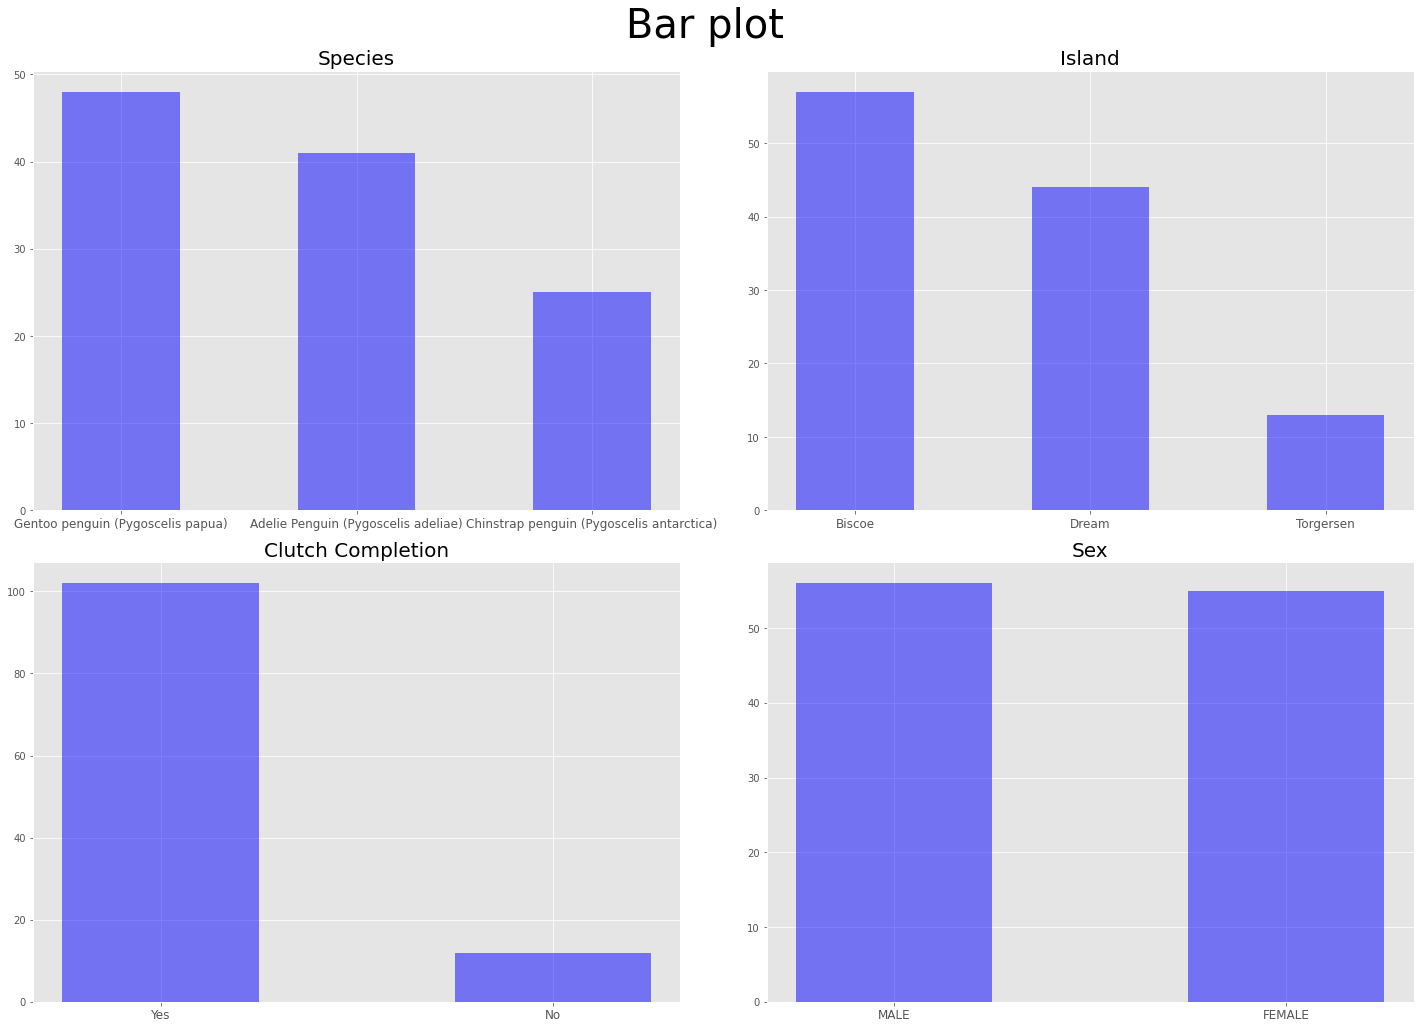

In [64]:
feature = categorical_feature

plt.figure(figsize=(20, 15))
plt.suptitle("Bar plot", fontsize=40)

for i in range(len(feature)):
  plt.subplot(2, 2, i+1)
  plt.title(feature[i], fontsize=20)
  temp = data[feature[i]].value_counts()
  plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
  plt.xticks(temp.keys(), fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**상관관계 시각화**

In [65]:
from sklearn.preprocessing import LabelEncoder

corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

In [66]:
corr_df

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,2,0,1,50.0,15.3,220,1,8.305150,-25.190170,5550
1,1,1,0,49.5,19.0,200,1,9.630740,-24.346840,3800
2,2,0,1,45.1,14.4,210,0,8.519510,-27.018540,4400
3,2,0,1,44.5,14.7,214,0,8.201060,-26.165240,4850
4,2,0,0,49.6,16.0,225,1,8.383240,-26.842720,5700
...,...,...,...,...,...,...,...,...,...,...
109,0,2,1,36.6,17.8,185,0,8.737634,-25.723051,3700
110,0,1,1,39.2,18.6,190,1,9.110060,-25.795490,4250
111,0,1,1,43.2,18.5,192,1,8.970250,-26.036790,4100
112,1,1,0,46.9,16.6,192,0,9.805890,-24.737350,2700


In [67]:
heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

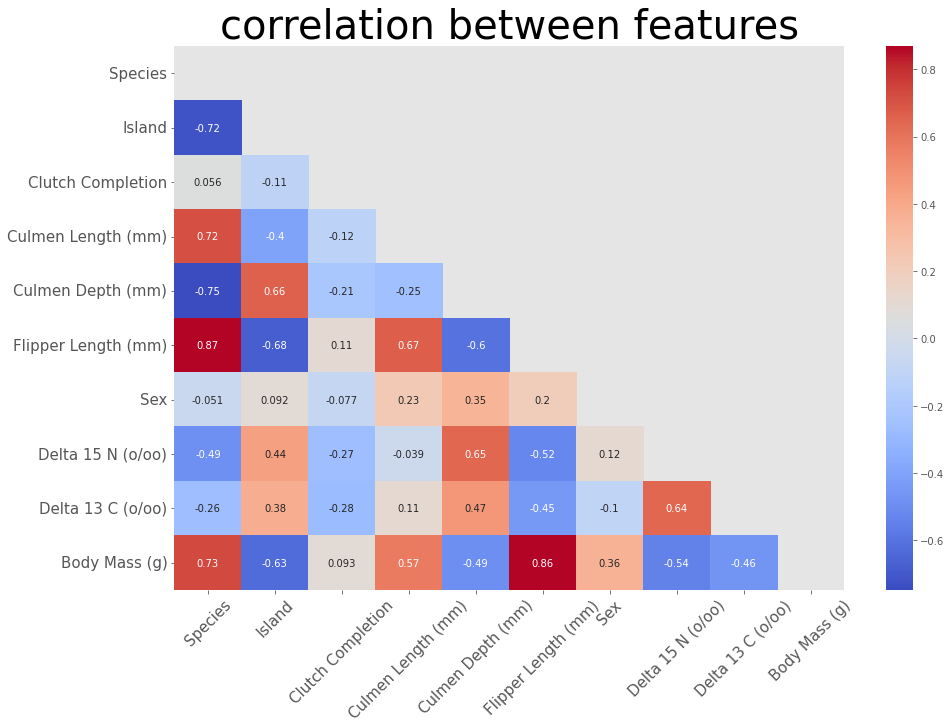

In [68]:
plt.figure(figsize=(15, 10))

heatmap_ax = sns.heatmap(heat_table, annot=True, mask=mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

**Target과 다른 feature들과의 관계**

In [69]:
target = "Body Mass (g)"

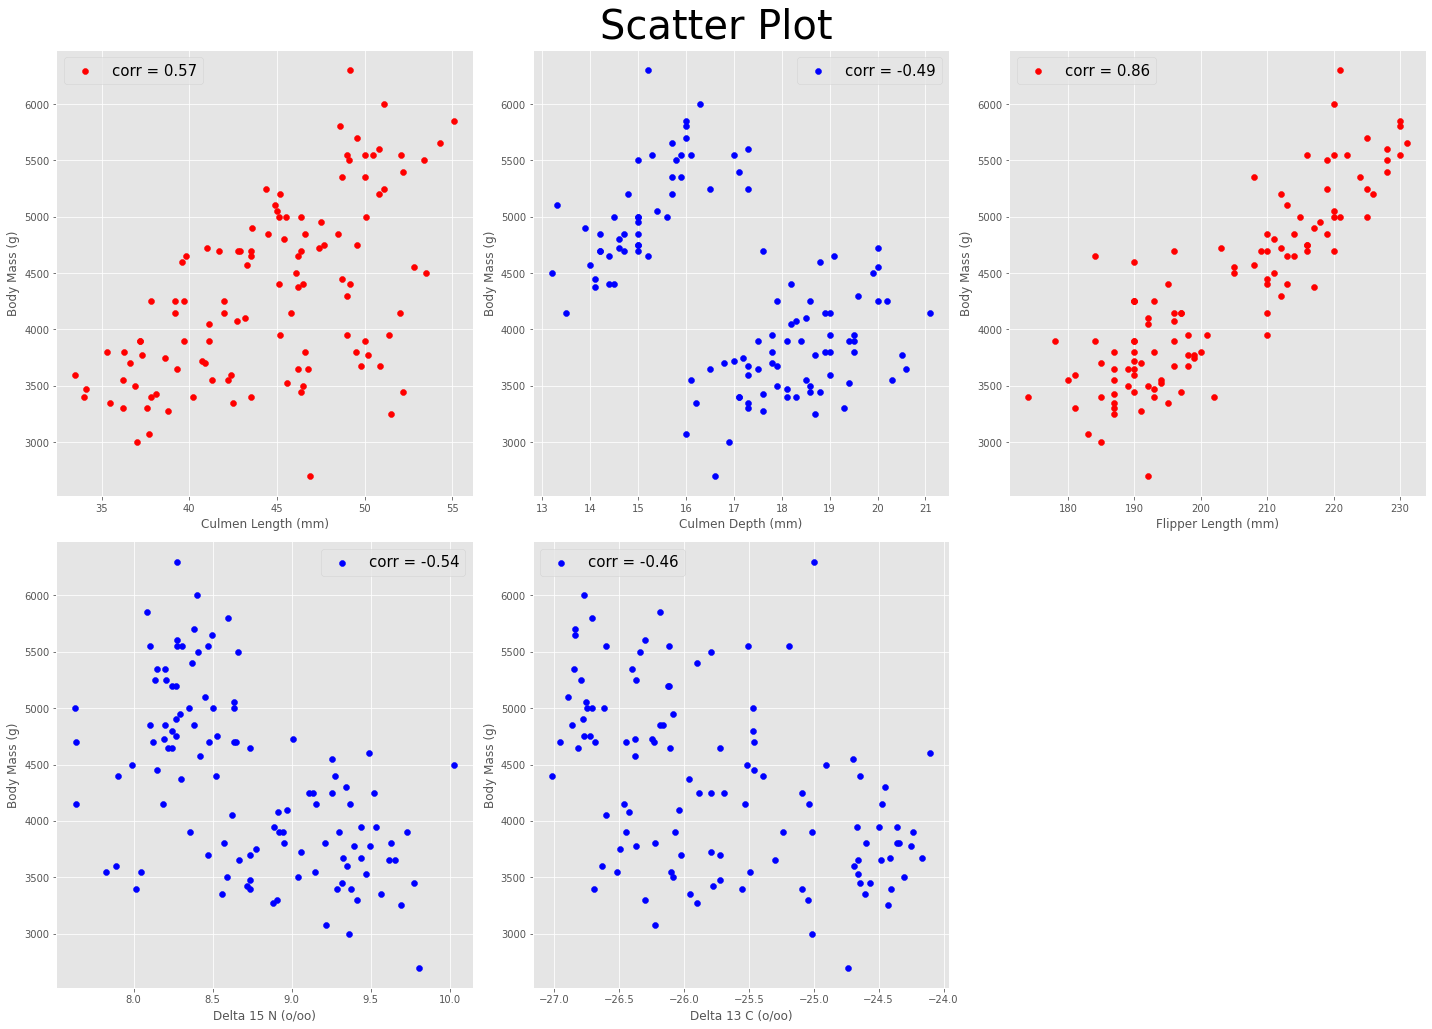

In [70]:
feature = numeric_feature

plt.figure(figsize=(20, 15))
plt.suptitle("Scatter Plot", fontsize=40)

# id는 제외하고 시각화
for i in range(len(feature[:-1])):
  plt.subplot(2, 3, i+1)
  plt.xlabel(feature[i])
  plt.ylabel(target)
  corr_score = data[[feature[i], target]].corr().iloc[0, 1].round(2)
  c = 'red' if corr_score > 0 else 'blue'
  plt.scatter(data[feature[i]], data[target], color=c, label=f"corr = {corr_score}")
  plt.legend(fontsize=15)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**데이터 전처리**

In [71]:
raw_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dacon/dataset/test.csv')
raw_test = raw_test.drop('id', axis=1)
raw_test.head()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


In [72]:
test_missing_col = check_missing_col(raw_test)

결측치가 존재하는 컬럼은: Sex입니다.
해당 컬럼에 총 6개의 결측치가 존재합니다.
결측치가 존재하는 컬럼은: Delta 15 N (o/oo)입니다.
해당 컬럼에 총 9개의 결측치가 존재합니다.
결측치가 존재하는 컬럼은: Delta 13 C (o/oo)입니다.
해당 컬럼에 총 8개의 결측치가 존재합니다.


In [73]:
raw_test = handle_na(raw_test, test_missing_col)
test_missing_col = check_missing_col(raw_test)

결측치가 존재하는 컬럼은: Sex입니다.
해당 컬럼에 총 6개의 결측치가 존재합니다.


In [74]:
train = data.copy()
test = raw_test.copy()
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [75]:
print(train.shape)
print(test.shape)

(114, 16)
(228, 15)


In [76]:
numeric_feature[:-1]

Index(['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

In [77]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
scaled_train = std_scaler.fit_transform(train[numeric_feature[:-1]])
scaled_test = std_scaler.fit_transform(test[numeric_feature[:-1]])

In [78]:
train[numeric_feature[:-1]] = pd.DataFrame(data=scaled_train, columns=numeric_feature[:-1], index=train.index)
test[numeric_feature[:-1]] = pd.DataFrame(data=scaled_test, columns=numeric_feature[:-1], index=test.index)

train[numeric_feature[:-1]].head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,1.016685,-0.887255,1.161653,-0.775548,0.630951
1,0.922318,1.027037,-0.209242,1.601553,1.629486
2,0.091884,-1.352893,0.476205,-0.391149,-1.533908
3,-0.021357,-1.197680,0.750384,-0.962206,-0.523568
4,0.941191,-0.525091,1.504376,-0.635514,-1.325731


In [79]:
train

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes,Sex_FEMALE,Sex_MALE
0,1.016685,-0.887255,1.161653,-7.755480e-01,6.309514e-01,5550,0,0,1,1,0,0,0,1,0,1
1,0.922318,1.027037,-0.209242,1.601553e+00,1.629486e+00,3800,0,1,0,0,1,0,1,0,0,1
2,0.091884,-1.352893,0.476205,-3.911490e-01,-1.533908e+00,4400,0,0,1,1,0,0,0,1,1,0
3,-0.021357,-1.197680,0.750384,-9.622064e-01,-5.235685e-01,4850,0,0,1,1,0,0,0,1,1,0
4,0.941191,-0.525091,1.504376,-6.355139e-01,-1.325731e+00,5700,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.512363,0.406186,-1.237413,-6.370870e-15,1.261964e-14,3700,1,0,0,0,0,1,0,1,1,0
110,-1.021652,0.820087,-0.894689,6.678491e-01,-8.577043e-02,4250,1,0,0,0,1,0,0,1,0,1
111,-0.266712,0.768349,-0.757600,4.171361e-01,-3.714788e-01,4100,1,0,0,0,1,0,0,1,0,1
112,0.431607,-0.214666,-0.757600,1.915640e+00,1.167108e+00,2700,0,1,0,0,1,0,1,0,1,0


In [80]:
train_label = train[target]
train.drop(target, axis=1, inplace=True)

In [81]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
  ridge_reg = Ridge(alpha=alpha)
  neg_mse_scores = cross_val_score(ridge_reg, train, train_label, scoring = 'neg_mean_squared_error', cv = 5)
  avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
  print('alpha 값 ', alpha, '일때 평균 rmse :', np.round(avg_rmse,4))

alpha 값  0 일때 평균 rmse : 339.4875
alpha 값  0.1 일때 평균 rmse : 337.4481
alpha 값  1 일때 평균 rmse : 330.4727
alpha 값  10 일때 평균 rmse : 329.2807
alpha 값  100 일때 평균 rmse : 405.4389


In [82]:
ridge = Ridge(alpha=10)
ridge.fit(train, train_label)

sample_submission_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dacon/dataset/sample_submission.csv')
sample_submission_df[target] = pd.DataFrame(data=ridge.predict(test), columns=[target], index=test.index)

sample_submission_df.to_csv('/content/drive/MyDrive/Colab Notebooks/dacon/Result#1.csv', index=False)